## Read Result


In [6]:
import pickle
import operator    
import re
import numpy as np
import matplotlib.pyplot as plt


###  RSF

#### reduced


In [131]:
n_components = 25
RSF_reduced_n_trees = [50]

with open('RSF_results/RSF_P_01.pickle', 'rb') as f:
    result = pickle.load(f)
    RSF_reduced_max_features = result[0]
    RSF_reduced_max_depths = result[1]
    RSF_reduced_result = result[2:]


In [135]:
RSF_reduced_dict = {}
for n_tree in RSF_reduced_n_trees:
    for row, max_feature in enumerate(RSF_reduced_max_features):
        for col, max_depth in enumerate(RSF_reduced_max_depths):
            RSF_reduced_dict[(n_tree, max_feature, max_depth)] = {
                "conc_PAN": RSF_reduced_result[0]["pancreatitis"][row][col],
                "conc_ICH": RSF_reduced_result[0]["ich"][row][col],
                "ipec_PAN": RSF_reduced_result[1]["pancreatitis"][row][col],
                "ipec_ICH": RSF_reduced_result[1]["ich"][row][col]                
            }
                
RSF_reduced_PAN_concordance_best = max(RSF_reduced_dict.items(), key=lambda x:x[1]["conc_PAN"])
RSF_reduced_ICH_concordance_best = max(RSF_reduced_dict.items(), key=lambda x:x[1]["conc_ICH"])
RSF_reduced_PAN_IPEC_best = min(RSF_reduced_dict.items(), key=lambda x:x[1]["ipec_PAN"])
RSF_reduced_ICH_IPEC_best = min(RSF_reduced_dict.items(), key=lambda x:x[1]["ipec_ICH"])

print("RSF reduced - PAN:")
print("best on concordance:")
print("n_tree, max_feature, max_depth:", RSF_reduced_PAN_concordance_best[0], "| concordance:", RSF_reduced_PAN_concordance_best[1]["conc_PAN"])
print("best on IPEC:")
print("n_tree, max_feature, max_depth:", RSF_reduced_PAN_IPEC_best[0], "| IPEC:", RSF_reduced_PAN_IPEC_best[1]["ipec_PAN"])
print()
print("RSF reduced - ICH:")
print("best on concordance:")
print("n_tree, max_feature, max_depth:", RSF_reduced_ICH_concordance_best[0], "| concordance:", RSF_reduced_ICH_concordance_best[1]["conc_ICH"])
print("best on IPEC:")
print("n_tree, max_feature, max_depth:", RSF_reduced_ICH_IPEC_best[0], "| IPEC:", RSF_reduced_ICH_IPEC_best[1]["ipec_ICH"])


RSF reduced - PAN:
best on concordance:
n_tree, max_feature, max_depth: (50, 20, 3) | concordance: 0.5730704665704667
best on IPEC:
n_tree, max_feature, max_depth: (50, 20, 3) | IPEC: 1.9541753518974598

RSF reduced - ICH:
best on concordance:
n_tree, max_feature, max_depth: (50, 40, 6) | concordance: 0.5952223771348901
best on IPEC:
n_tree, max_feature, max_depth: (50, 80, 6) | IPEC: 1.7582790761672764


#### without reduction


In [95]:
RSF_n_trees = [20, 50]
RSF_max_features = [10, 20, 40, 60, 80, 200]
RSF_max_depths = [5, 10, 15]
RSF_dict = {}

with open('RSF_results/RSF.out', 'r') as f:
    dataset = 'PAN'
    n_tree = 20
    max_feature = 10
    max_depth = 5
    for line in f:
        if re.match(r'For the ich dataset:', line):
            dataset = 'ICH'
            continue
        if re.match(r'\[LOG\] n_tree', line):
            tokens = line.split(" = ")
            n_tree = int(tokens[1].split(",")[0])
            max_feature = int(tokens[2].split(",")[0])
            max_depth = int(tokens[3].split("\n")[0])
            if (n_tree, max_feature, max_depth) not in RSF_dict:
                RSF_dict[(n_tree, max_feature, max_depth)] = {}
        if re.match(r'\[LOG\] avg\. concordance', line):
            concordance = float(line.split(": ")[1])
            RSF_dict[(n_tree, max_feature, max_depth)]["conc_" + dataset] = concordance
        if re.match(r'\[LOG\] avg\. ipec', line):
            ipec_score = float(line.split(": ")[1])
            RSF_dict[(n_tree, max_feature, max_depth)]["ipec_" + dataset] = ipec_score
 

In [96]:
RSF_PAN_concordance_best = max(RSF_dict.items(), key=lambda x:x[1]["conc_PAN"])
RSF_ICH_concordance_best = max(RSF_dict.items(), key=lambda x:x[1]["conc_ICH"])
RSF_PAN_IPEC_best = min(RSF_dict.items(), key=lambda x:x[1]["ipec_PAN"])
RSF_ICH_IPEC_best = min(RSF_dict.items(), key=lambda x:x[1]["ipec_ICH"])

print("RSF reduced - PAN:")
print("best on concordance:")
print("n_tree, max_feature, max_depth:", RSF_PAN_concordance_best[0], "| concordance:", RSF_PAN_concordance_best[1]["conc_PAN"])
print("best on IPEC:")
print("n_tree, max_feature, max_depth:", RSF_PAN_IPEC_best[0], "| IPEC:", RSF_PAN_IPEC_best[1]["ipec_PAN"])
print()
print("RSF reduced - ICH:")
print("best on concordance:")
print("n_tree, max_feature, max_depth:", RSF_ICH_concordance_best[0], "| concordance:", RSF_ICH_concordance_best[1]["conc_ICH"])
print("best on IPEC:")
print("n_tree, max_feature, max_depth:", RSF_ICH_IPEC_best[0], "| IPEC:", RSF_ICH_IPEC_best[1]["ipec_ICH"])


RSF reduced - PAN:
best on concordance:
n_tree, max_feature, max_depth: (50, 20, 10) | concordance: 0.559587542087542
best on IPEC:
n_tree, max_feature, max_depth: (50, 40, 5) | IPEC: 0.18194392586255279

RSF reduced - ICH:
best on concordance:
n_tree, max_feature, max_depth: (20, 10, 5) | concordance: 0.586682119205298
best on IPEC:
n_tree, max_feature, max_depth: (20, 80, 5) | IPEC: 0.18125757444497248


## New Results


### Pancreatitis and Ich


In [8]:
MODEL = "COX"
REDUCED = "_P"
TAIL = '_1105_2215'
# REDUCED = ""
# TAIL = '_1105_1857'

with open(MODEL + '_results/' + MODEL + REDUCED + '_0' + TAIL + '.pickle', 'rb') as f:
    result = pickle.load(f)
    value = result[0]

PAN_concordance = list(result[1]["pancreatitis"])
PAN_IPEC = list(result[2]["pancreatitis"])

print(value)
print("PAN:")
print("concordance:")
print(PAN_concordance)
print("best on concordance:")
print("coefficient:", value[np.argmax(PAN_concordance)], "| concordance:", np.max(PAN_concordance))
print("IPEC:")
print(PAN_IPEC)
print("best on IPEC:")
print("coefficient:", value[np.argmin(PAN_IPEC)], "| IPEC:", np.min(PAN_IPEC))


[0.0001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.07, 0.09]
PAN:
concordance:
[0.5730101010101011, 0.5737898027898027, 0.5722751322751324, 0.5710317460317461, 0.5693006253006253, 0.568430735930736, 0.5634973544973545, 0.5593405483405484]
best on concordance:
coefficient: 0.01 | concordance: 0.5737898027898027
IPEC:
[0.1825160491311066, 0.1821284149052146, 0.18193802921016808, 0.18179335590733556, 0.18184891882922616, 0.18205052309593497, 0.1828051369383863, 0.18372030661529215]
best on IPEC:
coefficient: 0.03 | IPEC: 0.18179335590733556


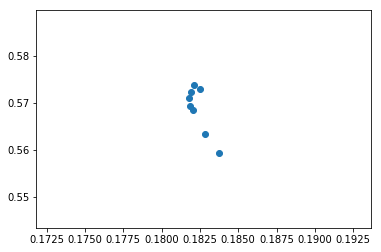

In [9]:
plt.scatter(PAN_IPEC, PAN_concordance)
plt.savefig(MODEL + '_results/' + MODEL + REDUCED + '_0.png')


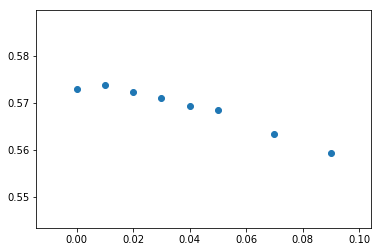

In [10]:
plt.scatter(value, PAN_concordance)


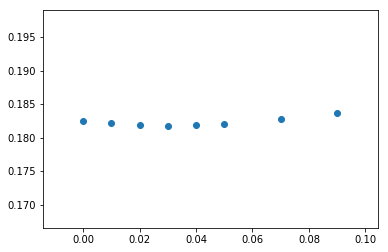

In [11]:
plt.scatter(value, PAN_IPEC)


In [12]:
MODEL = "COX"
REDUCED = "_P"
TAIL = '_1105_2154'
# REDUCED = ""
# TAIL = "_1105_2048"

with open(MODEL + '_results/' + MODEL + REDUCED + '_1' + TAIL + '.pickle', 'rb') as f:
    result = pickle.load(f)
    value = result[0]

ICH_concordance = list(result[1]["ich"])
ICH_IPEC = list(result[2]["ich"])

print(value)
print("ICH:")
print("concordance:")
print(ICH_concordance)
print("best on concordance:")
print("coefficient:", value[np.argmax(ICH_concordance)], "| concordance:", np.max(ICH_concordance))
print("IPEC:")
print(ICH_IPEC)
print("best on IPEC:")
print("coefficient:", value[np.argmin(ICH_IPEC)], "| IPEC:", np.min(ICH_IPEC))


[0.0001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.07, 0.09]
ICH:
concordance:
[0.5890788892761706, 0.5918909027535727, 0.5916985012199373, 0.5876929243638898, 0.5835284071104915, 0.582224236086906, 0.5767898222377135, 0.5703647031486]
best on concordance:
coefficient: 0.01 | concordance: 0.5918909027535727
IPEC:
[0.17989169791077356, 0.18047417763706247, 0.18118256111190656, 0.1821867048105869, 0.18308944252153872, 0.18367980153470015, 0.18444603218830347, 0.18550961269481497]
best on IPEC:
coefficient: 0.0001 | IPEC: 0.17989169791077356


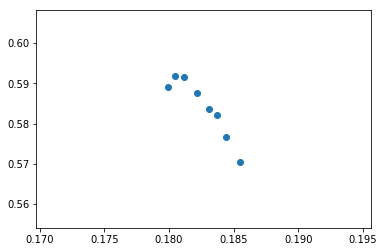

In [13]:
plt.scatter(ICH_IPEC, ICH_concordance)
plt.savefig(MODEL + '_results/' + MODEL + REDUCED + '_1.png')


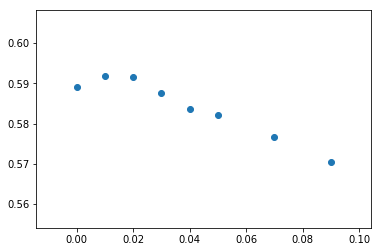

In [14]:
plt.scatter(value, ICH_concordance)


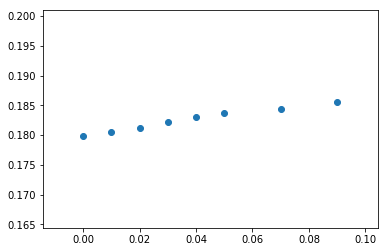

In [15]:
plt.scatter(value, ICH_IPEC)


In [3]:
MODEL = "COX"
REDUCED = "_P"
REDUCED = ""

with open(MODEL + '_results/' + MODEL + REDUCED + '_01_1105_1643.pickle', 'rb') as f:
    result = pickle.load(f)
    value = result[0]

ICH_concordance = list(result[1]["ich"])
ICH_IPEC = list(result[2]["ich"])
PAN_concordance = list(result[1]["pancreatitis"])
PAN_IPEC = list(result[2]["pancreatitis"])

print(value)
print("ICH:")
print("concordance:")
print(ICH_concordance)
print("best on concordance:")
print("coefficient:", value[np.argmax(ICH_concordance)], "| concordance:", np.max(ICH_concordance))
print("IPEC:")
print(ICH_IPEC)
print("best on IPEC:")
print("coefficient:", value[np.argmin(ICH_IPEC)], "| IPEC:", np.min(ICH_IPEC))
print()
print("PAN:")
print("concordance:")
print(PAN_concordance)
print("best on concordance:")
print("coefficient:", value[np.argmax(PAN_concordance)], "| concordance:", np.max(PAN_concordance))
print("IPEC:")
print(PAN_IPEC)
print("best on IPEC:")
print("coefficient:", value[np.argmin(PAN_IPEC)], "| IPEC:", np.min(PAN_IPEC))


[0.0001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15]
ICH:
concordance:
[0.507775531544092, 0.5360370628558151, 0.5557873823631928, 0.5747256883931684, 0.5942873242709423, 0.6121192052980132, 0.6085878935749971, 0.6035591960032531, 0.6013149761821773, 0.6009091437202277, 0.6012446845590798, 0.6016132217962123, 0.5999587545021494, 0.597615777855234, 0.5963851516207737, 0.5949674683397235]
best on concordance:
coefficient: 0.05 | concordance: 0.6121192052980132
IPEC:
[3.2519372049200745, 2.60858693930492, 2.596380531898638, 2.4825383090112543, 2.3120263590887316, 2.126985973136016, 2.021785994672357, 1.9870672891137542, 1.992729280652382, 1.9976016039583016, 2.0067390240152596, 2.0140313653701143, 2.0309459716695146, 2.022844657441902, 2.011311473834777, 1.9999084577253363]
best on IPEC:
coefficient: 0.07 | IPEC: 1.9870672891137542

PAN:
concordance:
[0.5264826839826839, 0.5317883597883598, 0.5487818662818662, 0.5540319865319866, 0.555715247715

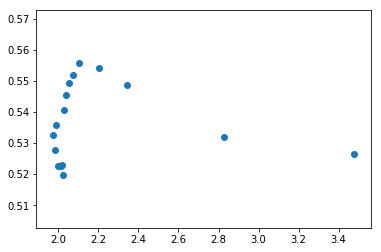

In [4]:
plt.scatter(PAN_IPEC, PAN_concordance)
plt.savefig(MODEL + '_results/' + MODEL + REDUCED + '_0.png')


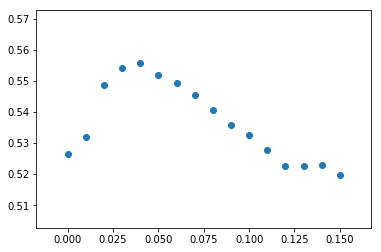

In [5]:
plt.scatter(value, PAN_concordance)


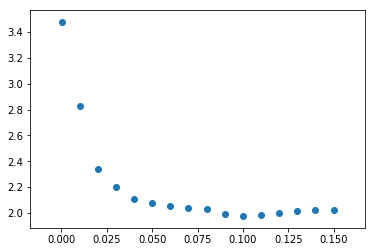

In [6]:
plt.scatter(value, PAN_IPEC)


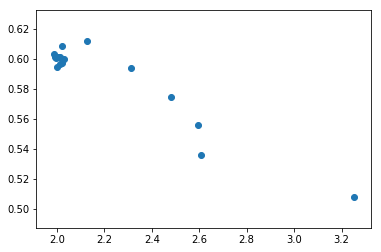

In [7]:
plt.scatter(ICH_IPEC, ICH_concordance)
plt.savefig(MODEL + '_results/' + MODEL + REDUCED + '_1.png')


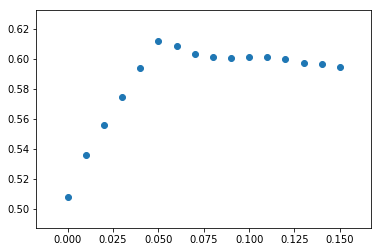

In [8]:
plt.scatter(value, ICH_concordance)


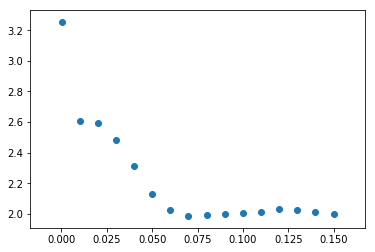

In [9]:
plt.scatter(value, ICH_IPEC)


### Sepsis


In [115]:
with open(MODEL + '_results/' + MODEL + REDUCED + '_2.pickle', 'rb') as f:
    result = pickle.load(f)
    value = result[0]
SEP_concordance = list(result[1]["sepsis"])
SEP_IPEC = list(result[2]["sepsis"])
print(value)
print("SEP:")
print("concordance:")
print(SEP_concordance)
print("best on concordance:")
print("coefficient:", value[np.argmax(SEP_concordance)], "| concordance:", np.max(SEP_concordance))
print("IPEC:")
print(SEP_IPEC)
print("best on IPEC:")
print("coefficient:", value[np.argmin(SEP_IPEC)], "| IPEC:", np.min(SEP_IPEC))


FileNotFoundError: [Errno 2] No such file or directory: 'COX_results/COX_P_2.pickle'

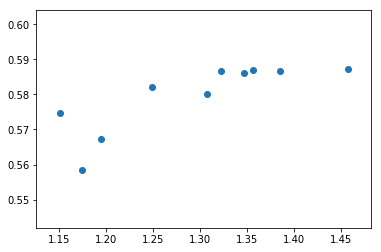

In [104]:
plt.scatter(SEP_IPEC, SEP_concordance)
plt.savefig(MODEL + '_results/' + MODEL + REDUCED + '_2.png')


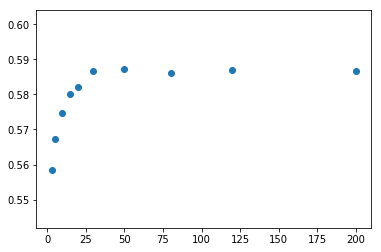

In [105]:
plt.scatter(value, SEP_concordance)


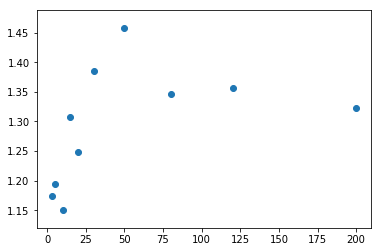

In [106]:
plt.scatter(value, SEP_IPEC)
